# Grafo



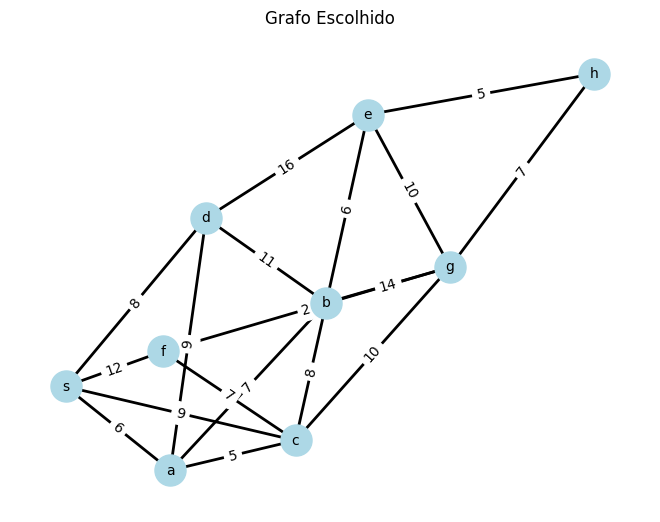

In [22]:
import networkx as nx
import heapq 
import matplotlib.pyplot as plt

# Grafo
G = nx.Graph()

# Adicionando nós
G.add_nodes_from(['s', 'f', 'g', 'c', 'a', 'b', 'd', 'e', 'h'])

# Adicionando arestas com pesos
G.add_weighted_edges_from([('s', 'c', 9), ('s', 'f', 12), ('s', 'd', 8), 
                           ('s', 'a', 6), ('f', 'c', 7), ('f', 'g', 2), ('g', 'c', 10), 
                           ('c', 'a', 5), ('c', 'b', 8), ('g', 'b', 14), ('g', 'h', 7), 
                           ('g', 'e', 10), ('e', 'd', 16), ('b', 'e', 6), ('b', 'd', 11), 
                           ('a', 'd', 9), ('b', 'a', 7), ('h', 'e', 5)])

# Desenhando o grafo
pos = nx.spring_layout(G)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Grafo Escolhido")
plt.show()

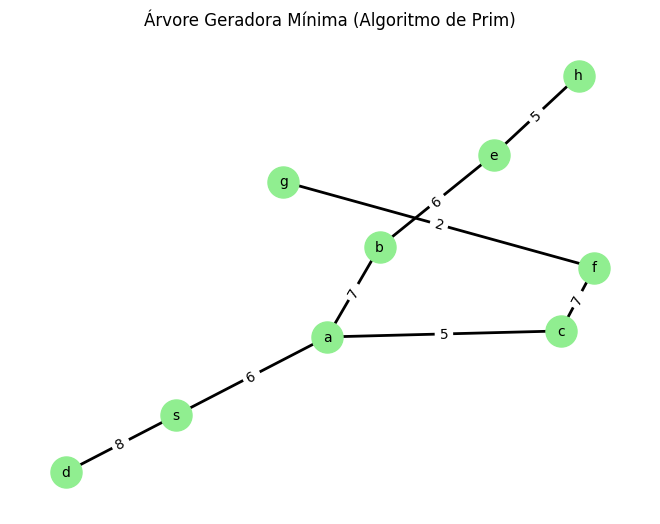

In [23]:
# Aplicando o algoritmo de Prim para encontrar a árvore geradora mínima
mst = nx.minimum_spanning_tree(G, algorithm='prim')

# Desenhando a árvore geradora mínima
pos = nx.spring_layout(mst)
edge_labels = {(u, v): d['weight'] for u, v, d in mst.edges(data=True)}
nx.draw(mst, pos, with_labels=True, node_size=500, node_color='lightgreen', font_size=10, font_color='black', width=2)
nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels)
plt.title("Árvore Geradora Mínima (Algoritmo de Prim)")
plt.show()

# questão 1

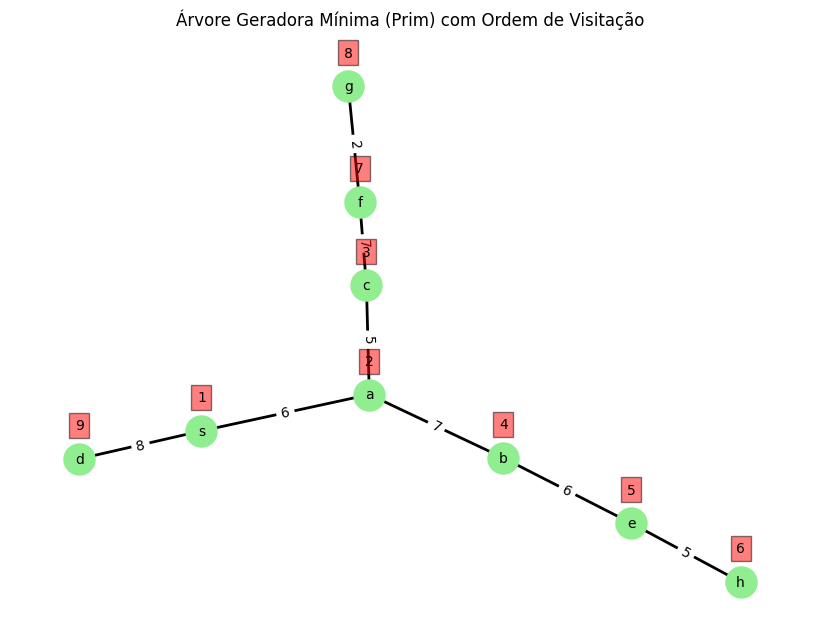

In [26]:
# Escolha do vértice inicial
start_node = 's'

# Inicializando o conjunto de nós incluídos na árvore, a lista de arestas e a ordem de visitação
mst_nodes = set([start_node])
mst_edges = []
visitation_order = [start_node]  # Lista para armazenar a ordem de visitação

# Inicializando o heap para escolher a aresta de menor peso
edges = [(data['weight'], start_node, to) for to, data in G[start_node].items()]
heapq.heapify(edges)

# Executando o algoritmo de Prim
while edges:
    # Selecionando a aresta de menor peso
    weight, frm, to = heapq.heappop(edges)

    # Se o nó de destino já foi incluído na árvore, continue para a próxima aresta
    if to in mst_nodes:
        continue

    # Adicionando a aresta e o nó à árvore geradora mínima
    mst_nodes.add(to)
    mst_edges.append((frm, to, weight))
    visitation_order.append(to)  # Registrando a ordem de visitação

    # Adicionando novas arestas que conectam ao novo nó
    for to_next, data in G[to].items():
        if to_next not in mst_nodes:
            heapq.heappush(edges, (data['weight'], to, to_next))

# Criando o grafo da árvore geradora mínima
mst = nx.Graph()
mst.add_weighted_edges_from(mst_edges)

# Desenhando a árvore geradora mínima com a ordem de visitação
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(mst)
edge_labels_mst = {(u, v): d['weight'] for u, v, d in mst.edges(data=True)}
nx.draw(mst, pos, with_labels=True, node_size=500, node_color='lightgreen', font_size=10, font_color='black', width=2)
nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels_mst)

# Adicionando a ordem de visitação nos nós
for i, node in enumerate(visitation_order):
    x, y = pos[node]
    plt.text(x, y+0.1, s=f"{i+1}", bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')

plt.title("Árvore Geradora Mínima (Prim) com Ordem de Visitação")
plt.show()

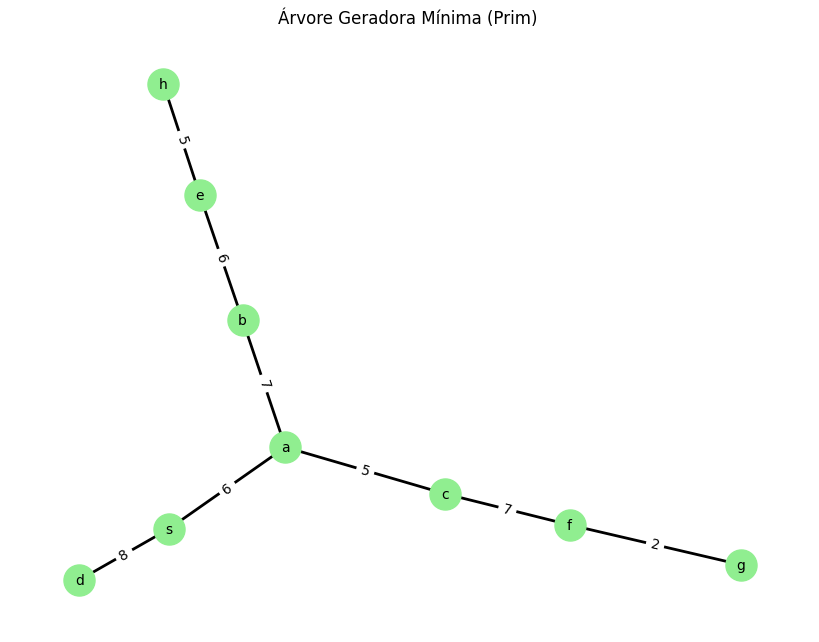

In [28]:
# Escolha do vértice inicial
start_node = 's'

# Inicializando o conjunto de nós incluídos na árvore, a lista de arestas e a ordem de visitação
mst_nodes = set([start_node])
mst_edges = []
visitation_order = [start_node]  # Lista para armazenar a ordem de visitação

# Inicializando o heap para escolher a aresta de menor peso
edges = [(data['weight'], start_node, to) for to, data in G[start_node].items()]
heapq.heapify(edges)

# Executando o algoritmo de Prim
while edges:
    # Selecionando a aresta de menor peso
    weight, frm, to = heapq.heappop(edges)

    # Se o nó de destino já foi incluído na árvore, continue para a próxima aresta
    if to in mst_nodes:
        continue

    # Adicionando a aresta e o nó à árvore geradora mínima
    mst_nodes.add(to)
    mst_edges.append((frm, to, weight))
    visitation_order.append(to)  # Registrando a ordem de visitação

    # Adicionando novas arestas que conectam ao novo nó
    for to_next, data in G[to].items():
        if to_next not in mst_nodes:
            heapq.heappush(edges, (data['weight'], to, to_next))

# Criando o grafo da árvore geradora mínima
mst = nx.Graph()
mst.add_weighted_edges_from(mst_edges)

# Desenhando a árvore geradora mínima com a ordem de visitação
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(mst)
edge_labels_mst = {(u, v): d['weight'] for u, v, d in mst.edges(data=True)}
nx.draw(mst, pos, with_labels=True, node_size=500, node_color='lightgreen', font_size=10, font_color='black', width=2)
nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels_mst)

plt.title("Árvore Geradora Mínima (Prim) ")
plt.show()

# questão 3

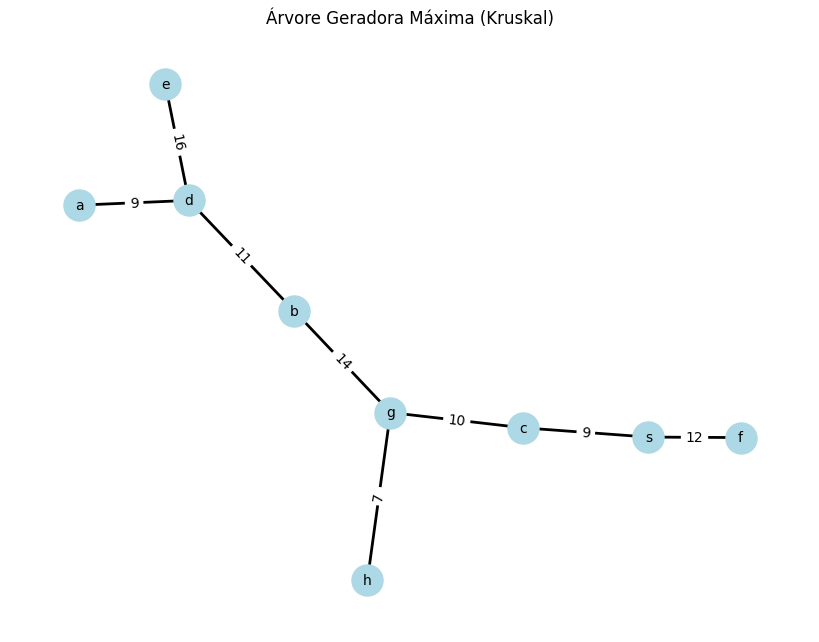

In [25]:
# Invertendo os pesos das arestas para encontrar a árvore geradora máxima
G_max = nx.Graph()
for u, v, weight in G.edges.data('weight'):
    G_max.add_edge(u, v, weight=-weight)  # Negando os pesos para usar Kruskal

# Encontrando a árvore geradora mínima nos pesos invertidos (que será a máxima no original)
mst_max = nx.minimum_spanning_tree(G_max)

# Revertendo os pesos para o valor original
mst_max_edges = [(u, v, -weight['weight']) for u, v, weight in mst_max.edges(data=True)]

# Criando o grafo da árvore geradora máxima
mst_max_graph = nx.Graph()
mst_max_graph.add_weighted_edges_from(mst_max_edges)

# Desenhando a árvore geradora máxima
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(mst_max_graph)
edge_labels_mst_max = {(u, v): d['weight'] for u, v, d in mst_max_graph.edges(data=True)}
nx.draw(mst_max_graph, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_color='black', width=2)
nx.draw_networkx_edge_labels(mst_max_graph, pos, edge_labels=edge_labels_mst_max)
plt.title("Árvore Geradora Máxima (Kruskal)")
plt.show()